In [1]:
# The Simulation class is what actually runs our experiment.
from runner import Simulation
# The algorithms in algorithms.py are the pre-defined ones we want to observe the experiment with. Otherss can be defined there.
from algorithms import RandomSelect, LoopSelect

In [2]:
# Simulation takes a config which is represented as a dictionary of keys. nPrisoners, nTrials, and algorithms are mandatory. The optional arguments include schema and param (for alternative methods for the number of attempts prisoners get), lower (whether to raise or lower the number of attempts if it ends up being a float, as it's a fraction of the total number of envelopes), chunks (how many times progress is reported as the experiment runs), and nEnvelopes (the number of envelopes, which is at least the number of prisoners).
sim = Simulation(config={'nPrisoners': 100,
              'nTrials': 10,
              'algorithms': (RandomSelect, LoopSelect),
              'schema': 'default',
              'lower': True,
              'chunks': 10,
              'nEnvelopes': 100,
              })

In [3]:
# We can run the simulation with .simulate()
sim.simulate()

Progress: Currently on trial 0
Progress: Currently on trial 1
Progress: Currently on trial 2
Progress: Currently on trial 3
Progress: Currently on trial 4
Progress: Currently on trial 5
Progress: Currently on trial 6
Progress: Currently on trial 7
Progress: Currently on trial 8
Progress: Currently on trial 9
Concluded: Finished trial 9 and stored in .results!


In [4]:
# We can access the data with .results. It's a little messy, so there's two other functions to get the info.
sim.results

{'RandomSelect': {'data':     Trial 0  Trial 1  Trial 2  Trial 3  Trial 4  Trial 5  Trial 6  Trial 7  \
  0      True    False    False     True    False    False     True    False   
  1     False    False    False    False     True    False    False    False   
  2      True     True     True    False    False    False    False     True   
  3     False    False    False    False    False    False    False    False   
  4     False     True    False     True    False     True     True     True   
  ..      ...      ...      ...      ...      ...      ...      ...      ...   
  95    False    False    False    False     True     True    False     True   
  96    False    False    False    False    False    False    False    False   
  97    False    False     True     True    False    False    False    False   
  98    False    False    False    False    False    False    False    False   
  99    False    False    False    False    False    False    False    False   
  
      Trial 8

In [5]:
# The .data key gets only the data.
sim.data

{'RandomSelect':     Trial 0  Trial 1  Trial 2  Trial 3  Trial 4  Trial 5  Trial 6  Trial 7  \
 0      True    False    False     True    False    False     True    False   
 1     False    False    False    False     True    False    False    False   
 2      True     True     True    False    False    False    False     True   
 3     False    False    False    False    False    False    False    False   
 4     False     True    False     True    False     True     True     True   
 ..      ...      ...      ...      ...      ...      ...      ...      ...   
 95    False    False    False    False     True     True    False     True   
 96    False    False    False    False    False    False    False    False   
 97    False    False     True     True    False    False    False    False   
 98    False    False    False    False    False    False    False    False   
 99    False    False    False    False    False    False    False    False   
 
     Trial 8  Trial 9  
 0     Fal

In [6]:
# The extra key gets only the extra information.
sim.extra

{'RandomSelect': defaultdict(dict, {}),
 'LoopSelect': defaultdict(dict,
             {'loop_size':     Trial 0  Trial 1  Trial 2  Trial 3  Trial 4  Trial 5  Trial 6  Trial 7  \
              0        90       38        4       74       67        4       15      100   
              1        90       25       10       74       67        4       15      100   
              2        90       38       19       74       67       53       10      100   
              3        90       12        7       74        4       27       43      100   
              4        90       25       19       74       67       53       15      100   
              ..      ...      ...      ...      ...      ...      ...      ...      ...   
              95       90       25       30       74       67       53       22      100   
              96       90       38       19       21       67       53       43      100   
              97       90        3       19       74        4       53       43      1

In [15]:
# From here, we can navigate the keys as data[algorithm][trial] or extra[algorithm][extra key][trial]. More generally, we have results[algorithm][(data/extra)]...
sim.data['LoopSelect']

,Trial 0,Trial 1,Trial 2,Trial 3,Trial 4,Trial 5,Trial 6,Trial 7,Trial 8,Trial 9
0,False,True,True,False,False,True,True,False,True,False
1,False,True,True,False,False,True,True,False,False,False
2,False,True,True,False,False,False,True,False,False,True
3,False,True,True,False,True,True,True,False,False,False
4,False,True,True,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...
95,False,True,True,False,False,False,True,False,False,False
96,False,True,True,True,False,False,True,False,False,False
97,False,True,True,False,True,False,True,False,False,False
98,False,True,True,False,False,False,True,False,False,False


In [10]:
# Of course, we actually to know whether each Trial was successful - not what each prisoner got in each trial. We can get that (among other statistics) by calling .stats()
sim.stats()

defaultdict(dict,
            {'success': {'RandomSelect': 0, 'LoopSelect': 3},
             'peak': {'RandomSelect': 16, 'LoopSelect': 100}})

2


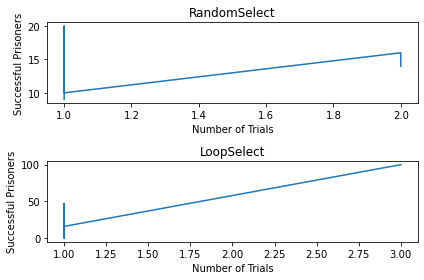

In [12]:
# We can also graph how many trials there were with each number of prisoner successes by calling .graph().
sim.graph()

In [14]:
# And we can manipulate the data manually, if we want, with standard pandas operations.
sim.data['LoopSelect'].sum().value_counts()

100    3
10     1
26     1
33     1
47     1
0      1
25     1
16     1
dtype: int64